Let's assume that you work as a consultant to a start-up company that was looking to develp a model to estimate the cost of good sold as they vary the production volume (number of units produced). The startup gathered data and has asked you to develop a model to predict its cost vs. number of units sold. You thought a polynomial regression model might be a good candidate.

# Step 1  Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# STEP#2: IMPORT DATASET

In [2]:
file_name ="EconomiesOfScale.csv" 
X_label = "Number of Units"
Y_label = "Manufacturing Cost"
data = pd.read_csv(file_name)

In [3]:

X = data[[X_label]]

Y = data[Y_label]
data.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [4]:
data.tail()

,Number of Units,Manufacturing Cost
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311
999,10.000000,21.547777


In [5]:
data.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


**lets try to see if any correlation exists between Number of units and Manufacturing Cost**

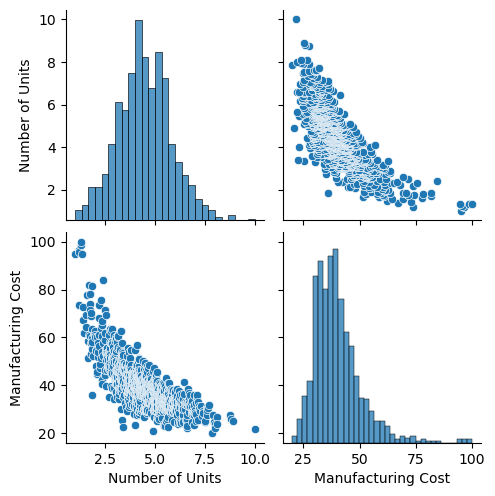

In [7]:
sns.pairplot(data)

In [10]:
sns.jointplot(x=X_label, y=Y_label, data=data)

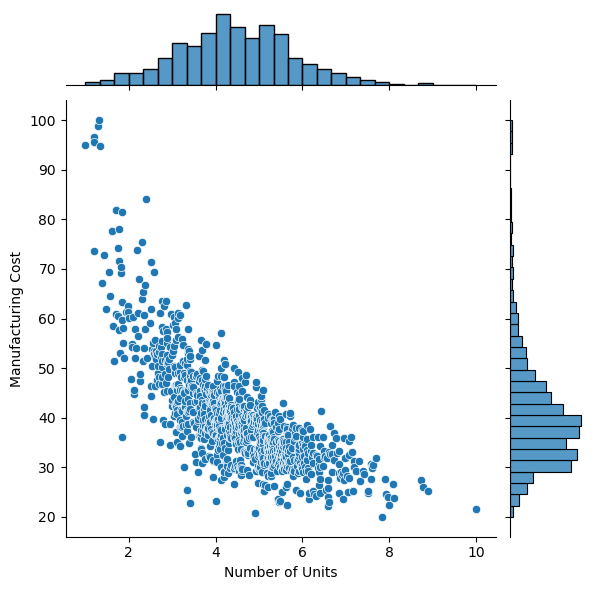

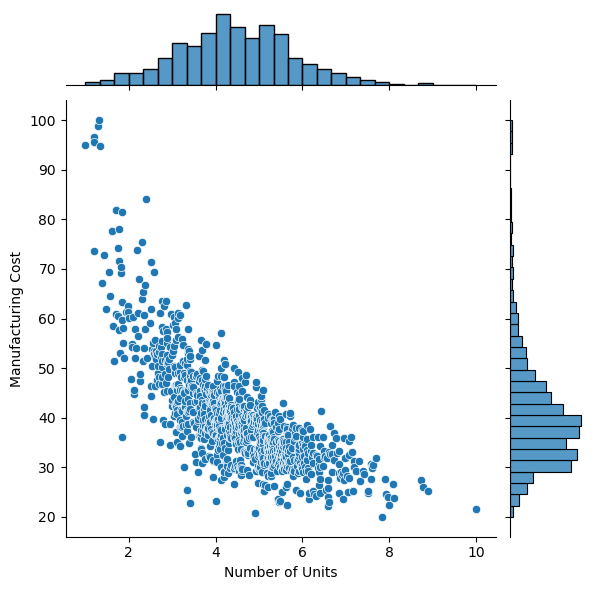

In [11]:
plt.show()

In [12]:
sns.lmplot(x =X_label, y =Y_label, data = data)

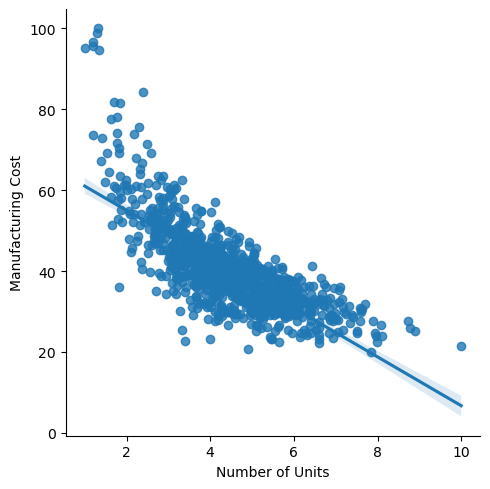

In [13]:
plt.show()

Linear regression may not be a good fit here

# Split data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [15]:
# since it is a 1 D array
X_train = X_train.to_numpy().reshape(-1,1)
X_test = X_test.to_numpy().reshape(-1,1)

## Assuming Linear Regression model

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train, Y_train)

LinearRegression()

In [22]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [-6.15573998]
Linear Model Coefficient (b):  67.71767823283906


**Plotting results of Regression on Training Set**

In [23]:
Y_pred = model.predict(X_train)

In [24]:
def plot_model(X, Y, Y_predict, set_type="Training", X_label=X_label, Y_label=Y_label):
    plt.clf()
    plt.scatter(X, Y, color = 'red')
    plt.plot(X, Y_predict, color = 'blue')
    plt.title(f'{X_label} vs {Y_label}({set_type} set)')
    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.show()

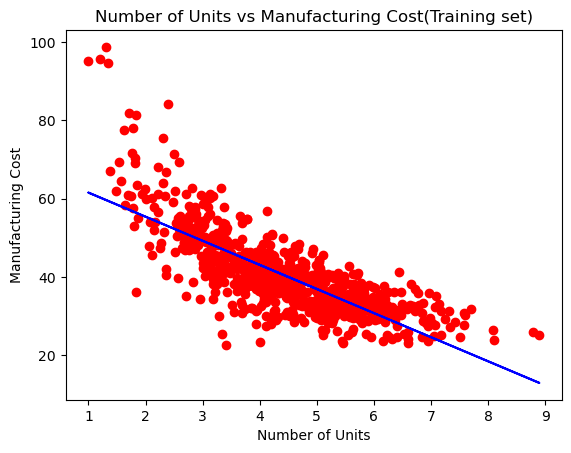

In [25]:

plot_model(X_train, Y_train, Y_pred)

**Plotting results of Regression on Test Set**

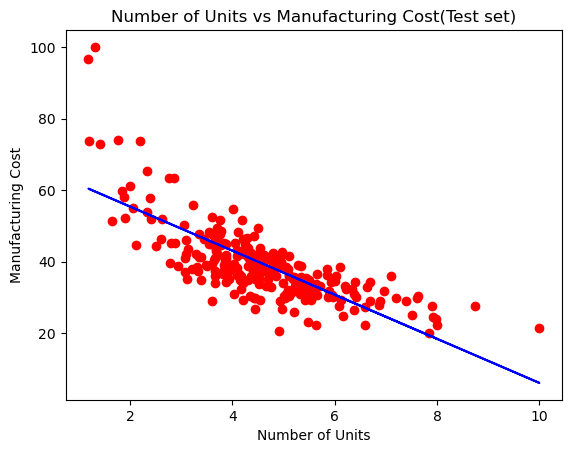

In [26]:
Y_pred = model.predict(X_test)
plot_model(X_test, Y_test, Y_pred, "Test")

In [27]:
rmse = mean_squared_error(Y_test, Y_pred, squared=False)

In [28]:
r2Score = r2_score(Y_test,Y_pred)

In [30]:
print(f"rmse = {rmse}")
print(f"r2Score = {r2Score}")

rmse = 7.034634004903984
r2Score = 0.5574918867766576


 ## Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
degree = 2

In [34]:
# Transform the matrix of features X into a multi array of features X_Columns 
# which contains the original features and their associated polynomial terms 
poly_regressor = PolynomialFeatures(degree=degree)
X_columns = poly_regressor.fit_transform(X_train)
print(X_columns)

[[ 1.          3.6074712  13.01384847]
 [ 1.          5.04573692 25.45946112]
 [ 1.          2.68348519  7.20109276]
 ...
 [ 1.          4.93885188 24.39225786]
 [ 1.          4.62435992 21.38470463]
 [ 1.          5.09134852 25.9218298 ]]


In [35]:
def create_and_train_poly_model(degree, X_train, Y_train):
    poly_regressor = PolynomialFeatures(degree=degree)
    X_columns = poly_regressor.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_columns, Y_train)
    return model

def poly_model_predict(X, model):
    poly_regressor = PolynomialFeatures(degree=degree)
    X_columns = poly_regressor.fit_transform(X)
    return model.predict(X_columns)

model = create_and_train_poly_model(degree, X_train, Y_train)
Y_predict = poly_model_predict(X_train, model)

In [36]:
print('Model Coefficients: ', model.coef_)

Model Coefficients:  [  0.         -17.75971924   1.28796451]


In [37]:
Y_predict.shape

(750,)

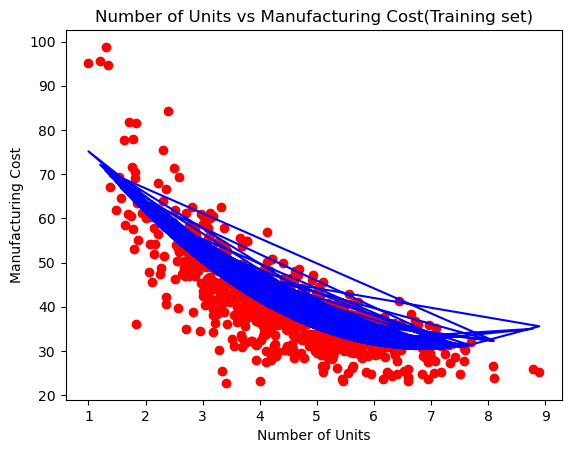

In [38]:
plot_model(X_train, Y_train, Y_predict)

**Plotting results of Regression on Test Set**

In [40]:
Y_predict = poly_model_predict(X_test, model)

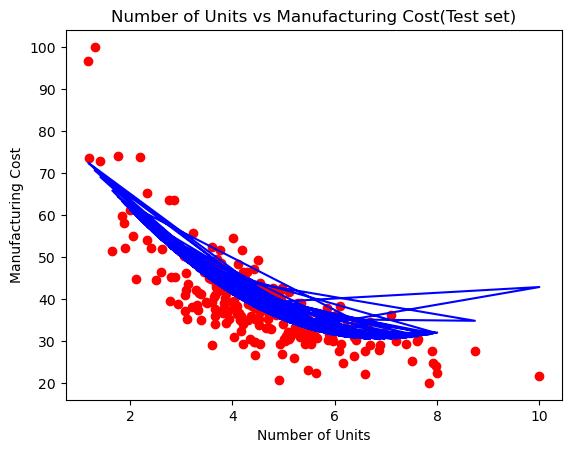

In [41]:
plot_model(X_test, Y_test, Y_predict, "Test")

**Plotting on whole data set**

In [42]:
Y_predict = poly_model_predict(X, model)

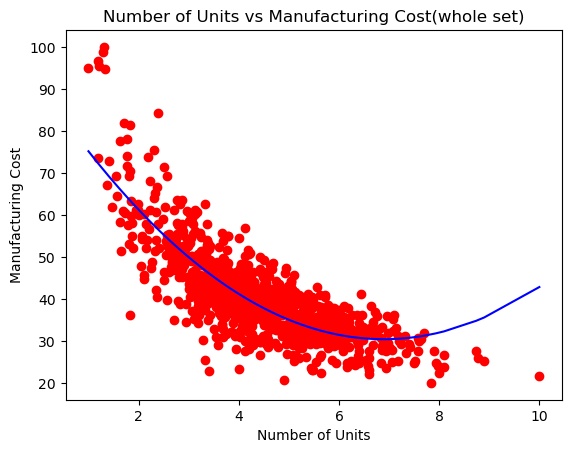

In [44]:
plot_model(X, Y, Y_predict, "whole")